<a href="https://colab.research.google.com/github/raghavdw/data_science_basics/blob/main/YahooFinance%2C_India_NSE_Stocks_and_ML_Clustering_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#When adding a stock to a portfolio, investors should consider key metrics such as:


*   Sharpe ratio: Helps evaluate a stock or portfolio's riskiness and the consistency of its returns
*  Return on equity: Indicates how efficiently a company is using its resources to generate profits for shareholders
*   Debt-to-total capital: Shows how much a company has borrowed to finance its business
*    Beta: Measures a stock or portfolio's volatility compared to the market standard
*   Standard deviation: Helps portfolio managers and investment advisors assess risk by showing how much a return deviates from its expected mean value
*   Alpha: Measures a portfolio manager's or investment strategy's ability to generate excess returns compared to the market
* Current ratio: Gauges a company's liquidity and how well it can handle its creditors
* Free cash flow: Evaluates a company's ability to generate cash flow, which is considered a main way to create shareholder value

Other metrics to consider include:
*   Earnings per share (EPS)
*   Price-to-earnings ratio (P/E ratio)
*   Dividend yield
*   Price-to-sales ratio (P/S ratio)
*   Return on invested capital (ROIC)
*   Gross profit margin
*   Moving averages: 50-day, 150-day, and 200-day

Source 1: ["What is alpha"](https://www.financestrategists.com/wealth-management/investments/alpha/#:~:text=Alpha%20is%20a%20key%20metric%20in%20investment,generate%20excess%20returns%20relative%20to%20the%20market.)

Source 2: ["What is beta"](https://smartasset.com/investing/how-to-calculate-the-beta-of-a-portfolio)

Source 3: ["Debt to Equity Ratio"](https://www.investorsedge.cibc.com/en/learn/investing/stocks/consider-key-financial-metrics.html#:~:text=The%20D/E%20ratio%20tells%20investors%20about%20how,ratio%20can%20vary%20from%20sector%20to%20sector.)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', 199)  # or 199
pd.options.mode.chained_assignment = None  # default='warn' https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

In [2]:
#https://www.geeksforgeeks.org/get-financial-data-from-yahoo-finance-with-python/
!pip install yfinance

In [3]:
import yfinance as yf

In [4]:
tickers = pd.read_html('https://ournifty.com/stock-list-in-nse-fo-futures-and-options.html#:~:text=NSE%20F%26O%20Stock%20List%3A%20%20%20%20SL,%20%201000%20%2052%20more%20rows%20')[0]

In [5]:
tickers = tickers.SYMBOL.to_list()

In [6]:
for count in range(len(tickers)):
    tickers[count] = tickers[count] + ".NS"

In [7]:
price_data = yf.download(tickers , start = '2021-01-01', end = '2024-04-24')

[*********************100%%**********************]  188 of 188 completed
ERROR:yfinance:
4 Failed downloads:
ERROR:yfinance:['FINNIFTY.NS', 'MIDCPNIFTY.NS', 'NIFTY.NS', 'BANKNIFTY.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [8]:
df = yf.download(tickers)

[*********************100%%**********************]  188 of 188 completed
ERROR:yfinance:
4 Failed downloads:
ERROR:yfinance:['FINNIFTY.NS', 'MIDCPNIFTY.NS', 'NIFTY.NS', 'BANKNIFTY.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [9]:
price_data.head()

Price        Adj Close                                                      \
Ticker     AARTIIND.NS       ABB.NS ABBOTINDIA.NS ABCAPITAL.NS    ABFRL.NS   
Date                                                                         
2021-01-01  623.674744  1221.613647  15412.633789    89.099998  166.500000   
2021-01-04  634.337402  1251.542114  15336.333984    89.349998  166.800003   
2021-01-05  661.624695  1281.965942  15275.304688    89.650002  166.949997   
2021-01-06  638.543152  1285.979614  15221.714844    88.550003  166.699997   
2021-01-07  633.224121  1290.934692  15109.148438    92.900002  168.350006   

Price                                                                        \
Ticker           ACC.NS ADANIENT.NS ADANIPORTS.NS     ALKEM.NS AMBUJACEM.NS   
Date                                                                          
2021-01-01  1562.376831  490.370636    493.584167  2844.833496   243.332840   
2021-01-04  1577.077515  493.715332    488.735016  2860.692627   245.321396   
2021-01-05  1580.824585  493.615448    489.273804  2876.937744   246.582443   
2021-01-06  1608.832153  490.121033    486.677795  2877.371582   253.275681   
2021-01-07  1637.560425  517.277832    503.380371  2899.594238   255.118729   

Price                                                                          \
Ticker     APOLLOHOSP.NS APOLLOTYRE.NS ASHOKLEY.NS ASIANPAINT.NS    ASTRAL.NS   
Date                                                                            
2021-01-01   2396.961670    173.980225   93.678581   2716.001953   977.900391   
2021-01-04   2391.403320    182.393951   98.357796   2694.620850  1005.310852   
2021-01-05   2490.861084    180.846603   99.019485   2733.909424   994.223511   
2021-01-06   2483.614990    180.266342   99.350342   2745.162842   966.785095   
2021-01-07   2489.968018    184.473190  104.974838   2732.343750   964.461243   

Price                                                                        \
Ticker          ATUL.NS   AUBANK.NS AUROPHARMA.NS AXISBANK.NS BAJAJ-AUTO.NS   
Date                                                                          
2021-01-01  6308.749023  436.723663    902.586304  622.216919   3146.810059   
2021-01-04  6393.508789  440.665070    939.555664  623.114685   3184.052002   
2021-01-05  6519.264160  441.363556    952.786804  662.763794   3157.114990   
2021-01-06  6513.769043  443.808228    942.571533  652.589722   3130.042236   
2021-01-07  6495.302246  443.034912    931.480774  669.396912   3107.669922   

Price                                                               \
Ticker     BAJAJFINSV.NS BAJFINANCE.NS BALKRISIND.NS BALRAMCHIN.NS   
Date                                                                 
2021-01-01    886.043701   5230.282227   1594.944458    165.583679   
2021-01-04    888.870483   5166.936523   1626.656494    164.714737   
2021-01-05    881.089355   5070.654297   1633.164307    163.556122   
2021-01-06    877.643127   4982.791504   1631.076172    168.190536   
2021-01-07    897.785339   5033.013184   1619.809204    166.790573   

Price                                                                        \
Ticker     BANDHANBNK.NS BANKBARODA.NS BANKNIFTY.NS BATAINDIA.NS     BEL.NS   
Date                                                                          
2021-01-01    396.233398     60.802090          NaN  1518.318604  39.199612   
2021-01-04    393.065125     62.027557          NaN  1538.528687  40.719215   
2021-01-05    397.867035     61.839024          NaN  1551.407349  40.781227   
2021-01-06    392.075043     61.744755          NaN  1599.738159  41.292934   
2021-01-07    401.777863     62.357491          NaN  1582.904175  40.858765   

Price                                                                        \
Ticker     BERGEPAINT.NS BHARATFORG.NS BHARTIARTL.NS    BHEL.NS   BIOCON.NS   
Date                                                                          
2021-01-01    631.305603    5

In [10]:
price_data_copy = price_data.copy()

In [11]:
price_data_copy.head()

Price        Adj Close                                                      \
Ticker     AARTIIND.NS       ABB.NS ABBOTINDIA.NS ABCAPITAL.NS    ABFRL.NS   
Date                                                                         
2021-01-01  623.674744  1221.613647  15412.633789    89.099998  166.500000   
2021-01-04  634.337402  1251.542114  15336.333984    89.349998  166.800003   
2021-01-05  661.624695  1281.965942  15275.304688    89.650002  166.949997   
2021-01-06  638.543152  1285.979614  15221.714844    88.550003  166.699997   
2021-01-07  633.224121  1290.934692  15109.148438    92.900002  168.350006   

Price                                                                        \
Ticker           ACC.NS ADANIENT.NS ADANIPORTS.NS     ALKEM.NS AMBUJACEM.NS   
Date                                                                          
2021-01-01  1562.376831  490.370636    493.584167  2844.833496   243.332840   
2021-01-04  1577.077515  493.715332    488.735016  2860.692627   245.321396   
2021-01-05  1580.824585  493.615448    489.273804  2876.937744   246.582443   
2021-01-06  1608.832153  490.121033    486.677795  2877.371582   253.275681   
2021-01-07  1637.560425  517.277832    503.380371  2899.594238   255.118729   

Price                                                                          \
Ticker     APOLLOHOSP.NS APOLLOTYRE.NS ASHOKLEY.NS ASIANPAINT.NS    ASTRAL.NS   
Date                                                                            
2021-01-01   2396.961670    173.980225   93.678581   2716.001953   977.900391   
2021-01-04   2391.403320    182.393951   98.357796   2694.620850  1005.310852   
2021-01-05   2490.861084    180.846603   99.019485   2733.909424   994.223511   
2021-01-06   2483.614990    180.266342   99.350342   2745.162842   966.785095   
2021-01-07   2489.968018    184.473190  104.974838   2732.343750   964.461243   

Price                                                                        \
Ticker          ATUL.NS   AUBANK.NS AUROPHARMA.NS AXISBANK.NS BAJAJ-AUTO.NS   
Date                                                                          
2021-01-01  6308.749023  436.723663    902.586304  622.216919   3146.810059   
2021-01-04  6393.508789  440.665070    939.555664  623.114685   3184.052002   
2021-01-05  6519.264160  441.363556    952.786804  662.763794   3157.114990   
2021-01-06  6513.769043  443.808228    942.571533  652.589722   3130.042236   
2021-01-07  6495.302246  443.034912    931.480774  669.396912   3107.669922   

Price                                                               \
Ticker     BAJAJFINSV.NS BAJFINANCE.NS BALKRISIND.NS BALRAMCHIN.NS   
Date                                                                 
2021-01-01    886.043701   5230.282227   1594.944458    165.583679   
2021-01-04    888.870483   5166.936523   1626.656494    164.714737   
2021-01-05    881.089355   5070.654297   1633.164307    163.556122   
2021-01-06    877.643127   4982.791504   1631.076172    168.190536   
2021-01-07    897.785339   5033.013184   1619.809204    166.790573   

Price                                                                        \
Ticker     BANDHANBNK.NS BANKBARODA.NS BANKNIFTY.NS BATAINDIA.NS     BEL.NS   
Date                                                                          
2021-01-01    396.233398     60.802090          NaN  1518.318604  39.199612   
2021-01-04    393.065125     62.027557          NaN  1538.528687  40.719215   
2021-01-05    397.867035     61.839024          NaN  1551.407349  40.781227   
2021-01-06    392.075043     61.744755          NaN  1599.738159  41.292934   
2021-01-07    401.777863     62.357491          NaN  1582.904175  40.858765   

Price                                                                        \
Ticker     BERGEPAINT.NS BHARATFORG.NS BHARTIARTL.NS    BHEL.NS   BIOCON.NS   
Date                                                                          
2021-01-01    631.305603    5

In [12]:
df = price_data_copy.stack(level=1).rename_axis(['Date', 'Ticker']).reset_index(level=1)

In [13]:
df_sorted = df.sort_values(["Ticker","Date"]).reset_index()

In [14]:
df_sorted_final = df_sorted.rename_axis(None, axis = "columns")

In [15]:
df_sorted_final.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2021-01-01,AARTIIND.NS,623.674744,630.250000,637.500000,621.049988,622.000000,812396.0
1,2021-01-04,AARTIIND.NS,634.337402,641.025024,642.500000,631.075012,631.500000,665348.0
2,2021-01-05,AARTIIND.NS,661.624695,668.599976,682.950012,630.224976,639.500000,1381160.0
3,2021-01-06,AARTIIND.NS,638.543152,645.275024,674.950012,640.000000,668.599976,823618.0
4,2021-01-07,AARTIIND.NS,633.224121,639.900024,656.750000,637.500000,647.500000,498804.0


##Sharpe Ratio
---
- Sharpe Ratio = (Return on Portfolio - Risk Free Return) / standard deviation of the portfolio's excess return

In [16]:
risk_free_rate = 0.05
daily_risk_free_rate = (1 + risk_free_rate)**(1/365) - 1
trading_days = 252
annual_factor = trading_days**(0.5)

In [17]:
df_sorted_final["Daily Returns"] = df_sorted_final["Adj Close"].pct_change()
df_sorted_final["Daily Returns"].fillna(0, inplace=True)

df_sorted_final["Excess Returns"] = df_sorted_final["Daily Returns"].sub(daily_risk_free_rate,axis=0)





In [18]:
df_sorted_final.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,Daily Returns,Excess Returns
0,2021-01-01,AARTIIND.NS,623.674744,630.250000,637.500000,621.049988,622.000000,812396.0,0.000000,-0.000134
1,2021-01-04,AARTIIND.NS,634.337402,641.025024,642.500000,631.075012,631.500000,665348.0,0.017097,0.016963
2,2021-01-05,AARTIIND.NS,661.624695,668.599976,682.950012,630.224976,639.500000,1381160.0,0.043017,0.042883
3,2021-01-06,AARTIIND.NS,638.543152,645.275024,674.950012,640.000000,668.599976,823618.0,-0.034886,-0.035020
4,2021-01-07,AARTIIND.NS,633.224121,639.900024,656.750000,637.500000,647.500000,498804.0,-0.008330,-0.008464


In [19]:
df_grouped = df_sorted_final.groupby("Ticker")["Excess Returns"].mean() / df_sorted_final.groupby("Ticker")["Excess Returns"].std() * annual_factor

In [20]:
df_merged = pd.merge(df_sorted_final, df_grouped.to_frame(), on='Ticker')

In [21]:
df_merged.rename(columns={"Excess Returns_x":"Excess Returns","Excess Returns_y": "Annualized Sharpe Ratio"}, inplace = True)

In [22]:
df_merged.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,Daily Returns,Excess Returns,Annualized Sharpe Ratio
0,2021-01-01,AARTIIND.NS,623.674744,630.250000,637.500000,621.049988,622.000000,812396.0,0.000000,-0.000134,0.223502
1,2021-01-04,AARTIIND.NS,634.337402,641.025024,642.500000,631.075012,631.500000,665348.0,0.017097,0.016963,0.223502
2,2021-01-05,AARTIIND.NS,661.624695,668.599976,682.950012,630.224976,639.500000,1381160.0,0.043017,0.042883,0.223502
3,2021-01-06,AARTIIND.NS,638.543152,645.275024,674.950012,640.000000,668.599976,823618.0,-0.034886,-0.035020,0.223502
4,2021-01-07,AARTIIND.NS,633.224121,639.900024,656.750000,637.500000,647.500000,498804.0,-0.008330,-0.008464,0.223502


In [23]:
df_merged.isnull().sum()

Date                       0
Ticker                     0
Adj Close                  0
Close                      0
High                       0
Low                        0
Open                       0
Volume                     0
Daily Returns              0
Excess Returns             0
Annualized Sharpe Ratio    0
dtype: int64

In [24]:
df_merged.duplicated().sum()

0

<Axes: xlabel='Annualized Sharpe Ratio', ylabel='Density'>

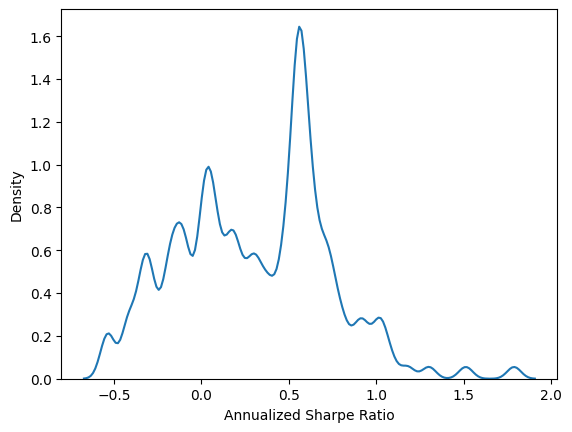

In [25]:
sns.kdeplot(df_merged["Annualized Sharpe Ratio"])

<Axes: xlabel='Ticker', ylabel='Annualized Sharpe Ratio'>

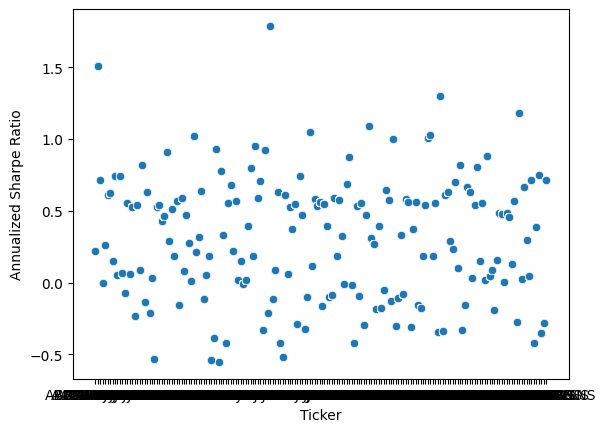

In [26]:
sns.scatterplot(data = df_merged,
               x = "Ticker",
               y = "Annualized Sharpe Ratio")

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# df_merged_scaled = scaler.fit_transform( df_merged[['Adj Close',
#                                                 'Volume',
#                                                 'High',
#                                                 'Low',
#                                                 'Annualized Sharpe Ratio']] )

df_merged_scaled = scaler.fit_transform(df_merged[['Annualized Sharpe Ratio']] )

In [28]:
# df_merged_scaled = pd.DataFrame(df_merged_scaled,
#                               columns = ['Adj Close',
#                                         'Volume',
#                                          'High',
#                                          'Low',
#                                          'Annualized Sharpe Ratio'])
df_merged_scaled = pd.DataFrame(df_merged_scaled,
                              columns = ['Annualized Sharpe Ratio'])

In [29]:
df_merged_scaled.shape

(149655, 1)

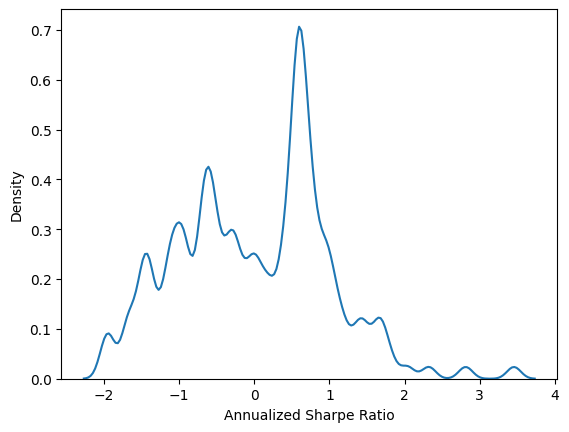

In [30]:
#sns.kdeplot(df_merged_scaled["Adj Close"]);
sns.kdeplot(df_merged_scaled["Annualized Sharpe Ratio"]);


In [31]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

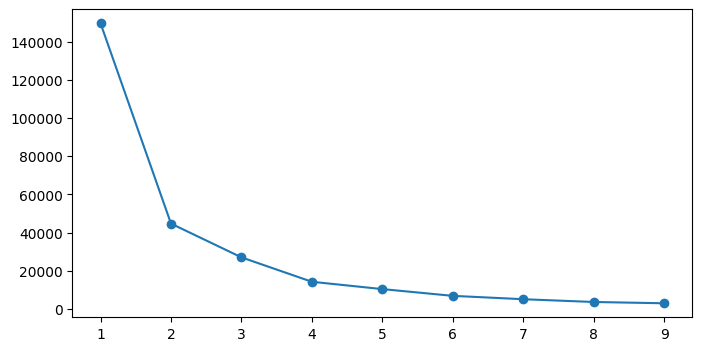

In [32]:
import matplotlib.pyplot as plt
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit(df_merged_scaled)
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(8,4))
#cluster_errors
plt.plot( cluster_range, cluster_errors, marker = "o" );

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()
df_merged_scaled_MinMax = scaler.fit_transform(df_merged[['Annualized Sharpe Ratio']])

In [40]:
k = 4
clusters = KMeans( k, random_state = 42 )
clusters.fit(df_merged_scaled_MinMax)
df_merged["clusterid"] = clusters.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
clusters.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

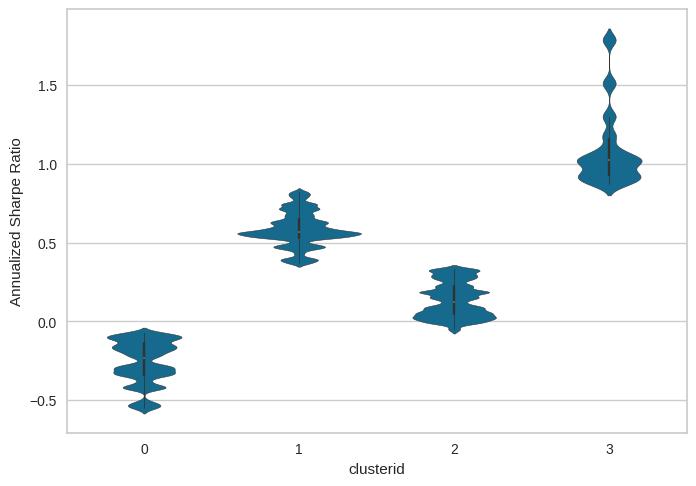

In [42]:
sns.violinplot(data = df_merged,
              y = 'Annualized Sharpe Ratio',
              x = 'clusterid');

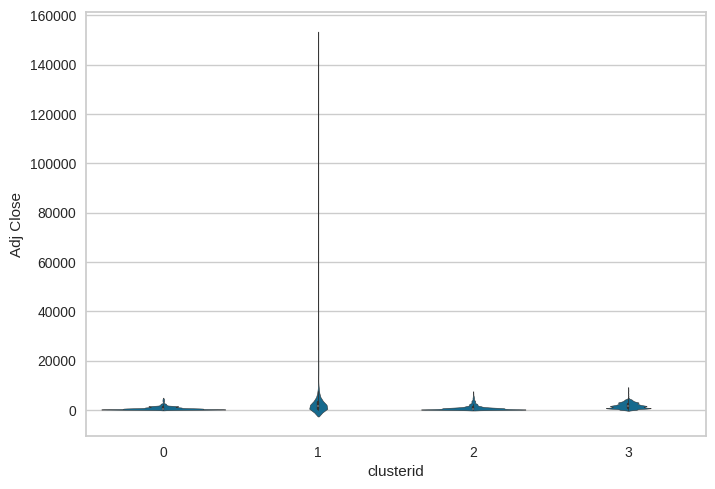

In [43]:
sns.violinplot(data = df_merged,
              y = 'Adj Close',
              x = 'clusterid');

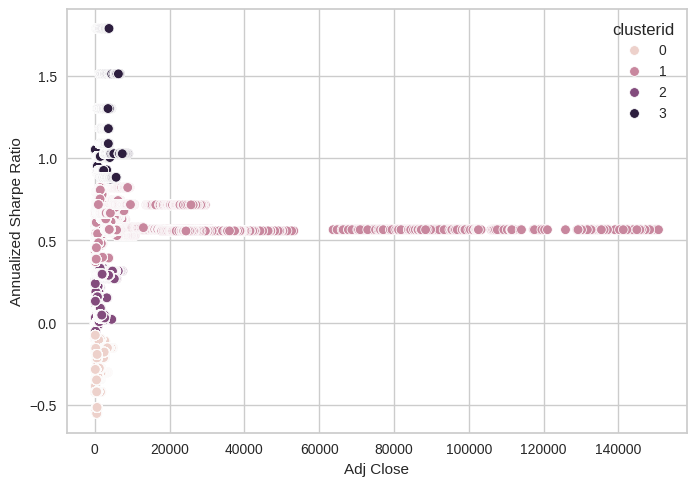

In [44]:
sns.scatterplot(data = df_merged,
               x = 'Adj Close',
               y = 'Annualized Sharpe Ratio',
               hue = 'clusterid');

In [48]:
df_merged[df_merged.clusterid == 0].groupby("Ticker").max()

,Date,Adj Close,Close,High,Low,Open,Volume,Daily Returns,Excess Returns,Annualized Sharpe Ratio,clusterid
Ticker,,,,,,,,,,,
ASHOKLEY.NS,2024-04-23,183.602234,188.899994,191.500000,187.600006,189.750000,1.970842e+08,0.101534,0.101401,-0.074314,0
AUBANK.NS,2024-04-23,801.700012,801.700012,813.400024,792.000000,813.400024,3.080721e+07,0.170732,0.170598,-0.232604,0
BAJAJFINSV.NS,2024-04-23,1905.963745,1907.655029,1932.500000,1860.050049,1906.300049,1.696498e+07,0.114534,0.114400,-0.138036,0
BALKRISIND.NS,2024-04-23,2710.093506,2714.550049,2782.649902,2641.050049,2779.800049,6.737946e+06,0.099045,0.098911,-0.212044,0
BANDHANBNK.NS,2024-04-23,415.243103,419.399994,424.899994,409.399994,424.899994,6.419514e+07,0.080799,0.080666,-0.534806,0
BPCL.NS,2024-04-23,657.599976,657.599976,687.950012,651.900024,666.000000,1.997910e+08,0.098141,0.098008,-0.158928,0
COLPAL.NS,2024-04-23,2800.250000,2800.250000,2815.899902,2754.000000,2811.649902,3.728079e+06,0.062805,0.062672,-0.111436,0
CROMPTON.NS,2024-04-23,483.749756,492.200012,512.799988,486.049988,492.399994,3.082899e+07,0.073158,0.073024,-0.535287,0
CUB.NS,2024-04-23,201.568909,203.100006,205.000000,196.550003,203.899994,2.926315e+07,0.094787,0.094653,-0.384948,0


In [49]:
df_merged[df_merged.clusterid == 1].groupby("Ticker").max()

,Date,Adj Close,Close,High,Low,Open,Volume,Daily Returns,Excess Returns,Annualized Sharpe Ratio,clusterid
Ticker,,,,,,,,,,,
ABBOTINDIA.NS,2024-04-23,29538.599609,29538.599609,29638.949219,29271.099609,29538.599609,112685.0,1.443560,1.443426,0.715348,1
ACC.NS,2024-04-23,2733.737793,2747.699951,2785.000000,2688.600098,2770.050049,8593295.0,4.929324,4.929190,0.606797,1
ADANIENT.NS,2024-04-23,4163.219727,4165.299805,4190.000000,4066.399902,4175.000000,43885579.0,0.200394,0.200260,0.620673,1
ALKEM.NS,2024-04-23,5471.850098,5471.850098,5520.000000,5405.450195,5470.000000,2521385.0,1.151754,1.151620,0.741674,1
APOLLOHOSP.NS,2024-04-23,6774.049805,6774.049805,6874.450195,6723.100098,6784.950195,8069431.0,2.765551,2.765418,0.741456,1
ASIANPAINT.NS,2024-04-23,3537.524658,3576.300049,3590.000000,3534.000000,3580.000000,10543708.0,14.551114,14.550980,0.556909,1
ATUL.NS,2024-04-23,10741.172852,10824.150391,10969.000000,10628.750000,10894.400391,569399.0,2.221050,2.220917,0.528756,1
AUROPHARMA.NS,2024-04-23,1159.177124,1160.849976,1177.099976,1144.050049,1163.900024,20460478.0,0.480864,0.480730,0.542869,1
BAJAJ-AUTO.NS,2024-04-23,9276.099609,9276.099609,9357.950195,9139.500000,9248.950195,8537143.0,1.980639,1.980506,0.820743,1


In [50]:
df_merged[df_merged.clusterid == 2].groupby("Ticker").max()

,Date,Adj Close,Close,High,Low,Open,Volume,Daily Returns,Excess Returns,Annualized Sharpe Ratio,clusterid
Ticker,,,,,,,,,,,
AARTIIND.NS,2024-04-23,1146.340942,1156.550049,1168.000000,1106.949951,1166.000000,15007983.0,0.110039,0.109906,0.223502,2
ABCAPITAL.NS,2024-04-23,216.850006,216.850006,220.000000,203.550003,206.500000,55493460.0,0.105582,0.105448,-0.001368,2
ABFRL.NS,2024-04-23,358.149994,358.149994,359.500000,353.000000,358.149994,91062159.0,0.115757,0.115623,0.263692,2
ADANIPORTS.NS,2024-04-23,1404.150024,1404.150024,1424.949951,1389.199951,1408.599976,115517458.0,0.153019,0.152885,0.150243,2
AMBUJACEM.NS,2024-04-23,636.549988,636.549988,640.799988,626.500000,640.000000,91035714.0,0.093284,0.093151,0.050167,2
APOLLOTYRE.NS,2024-04-23,553.000000,553.000000,557.900024,547.250000,556.000000,81015566.0,0.086702,0.086569,0.066761,2
ASTRAL.NS,2024-04-23,2106.750000,2106.750000,2143.800049,2088.000000,2115.000000,17916345.0,0.099892,0.099758,0.059767,2
AXISBANK.NS,2024-04-23,1136.949951,1136.949951,1151.849976,1127.150024,1150.000000,64303975.0,0.090271,0.090137,0.086292,2
BALRAMCHIN.NS,2024-04-23,509.984619,516.950012,525.900024,511.200012,520.000000,24929219.0,0.160430,0.160296,0.029676,2


In [60]:
df_merged[df_merged.clusterid == 3].groupby("Ticker").max()

,Date,Adj Close,Close,High,Low,Open,Volume,Daily Returns,Excess Returns,Annualized Sharpe Ratio,clusterid
Ticker,,,,,,,,,,,
ABB.NS,2024-04-23,6752.950195,6752.950195,6773.100098,6642.000000,6719.000000,6409415.0,0.648713,0.648579,1.511021,3
BHARATFORG.NS,2024-04-23,1311.150635,1314.050049,1330.000000,1276.000000,1324.000000,22014361.0,0.092194,0.092060,0.909577,3
CHOLAFIN.NS,2024-04-23,1297.989990,1299.449951,1310.000000,1280.300049,1305.300049,40407205.0,0.137019,0.136885,1.022633,3
CUMMINSIND.NS,2024-04-23,3159.149902,3159.149902,3188.000000,3118.000000,3150.000000,19211098.0,2.528140,2.528006,0.927830,3
GNFC.NS,2024-04-23,849.360229,902.849976,912.000000,881.299988,898.150024,16927605.0,1.518368,1.518235,0.951346,3
GRASIM.NS,2024-04-23,2370.149902,2370.149902,2376.000000,2291.550049,2309.949951,15405089.0,1.217852,1.217719,0.924371,3
HAL.NS,2024-04-23,3795.699951,3795.699951,3831.850098,3783.050049,3800.000000,23508736.0,0.095106,0.094973,1.786779,3
IDFC.NS,2024-04-23,130.699997,130.699997,137.000000,129.000000,131.250000,140397270.0,1.277928,1.277794,1.050914,3
JKCEMENT.NS,2024-04-23,4514.899902,4514.899902,4555.000000,4489.799805,4552.350098,1228213.0,1.082043,1.081909,0.872274,3


# Evaluating Cluster Performane

## Calinski-Harabasz Index

In [61]:
cluster_range = range( 3, 6 )
ch_scores = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit(df_merged_scaled_MinMax)
  print(f"n_cluster: {num_clusters} - CH Score: {calinski_harabasz_score(df_merged_scaled_MinMax, clusters.labels_)}" )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster: 3 - CH Score: 339116.9970376979


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster: 4 - CH Score: 473542.8272818467


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster: 5 - CH Score: 500014.3220440947


## Davies-Bouldin Index

In [62]:
from sklearn.metrics import davies_bouldin_score

In [63]:
cluster_range = range( 3, 6 )
ch_scores = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit(df_merged_scaled_MinMax)
  print(f"n_cluster: {num_clusters} - CH Score: {davies_bouldin_score(df_merged_scaled_MinMax, clusters.labels_)}" )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster: 3 - CH Score: 0.5219098887131494


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster: 4 - CH Score: 0.5308239619355251


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster: 5 - CH Score: 0.5247783592346293
